# Activity 1.2 : Training Neural Networks


Name: Justin Kirk F. McCarthy



#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv("/content/drive/MyDrive/CPE313 Files/pima-indians-diabetes.csv", names=names)

Mounted at /content/drive


Check the top 5 samples of the data

In [ ]:

print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
200,0,113,80,16,0,31.0,0.874,21,0
428,0,135,94,46,145,40.6,0.284,26,0
712,10,129,62,36,0,41.2,0.441,38,1
206,8,196,76,29,280,37.5,0.605,57,1
272,3,122,78,0,0,23.0,0.254,40,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model = Sequential([
    Dense(12, input_shape=(8,), activation="sigmoid"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:

model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)


Epoch 1/200
18/18 [==============================] - 2s 26ms/step - loss: 0.6856 - accuracy: 0.6441 - val_loss: 0.6975 - val_accuracy: 0.6354
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.6458 - val_loss: 0.6952 - val_accuracy: 0.6354
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6810 - accuracy: 0.6458 - val_loss: 0.6928 - val_accuracy: 0.6354
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6788 - accuracy: 0.6441 - val_loss: 0.6905 - val_accuracy: 0.6406
Epoch 5/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6768 - accuracy: 0.6441 - val_loss: 0.6884 - val_accuracy: 0.6406
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6747 - accuracy: 0.6424 - val_loss: 0.6862 - val_accuracy: 0.6406
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6725 - accuracy: 0.6424 - val_loss: 0.6841 - val_accuracy: 0.6406
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model.predict(X_test_norm)>0.5).astype('int32')
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 4ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.42399317],
       [0.5803295 ],
       [0.29757464],
       [0.31578976],
       [0.21090847],
       [0.468086  ],
       [0.11815926],
       [0.32505357],
       [0.7596776 ],
       [0.24257787]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])



Evaluate the model performance and plot the ROC CURVE

accuracy is 0.760
roc-auc is 0.824


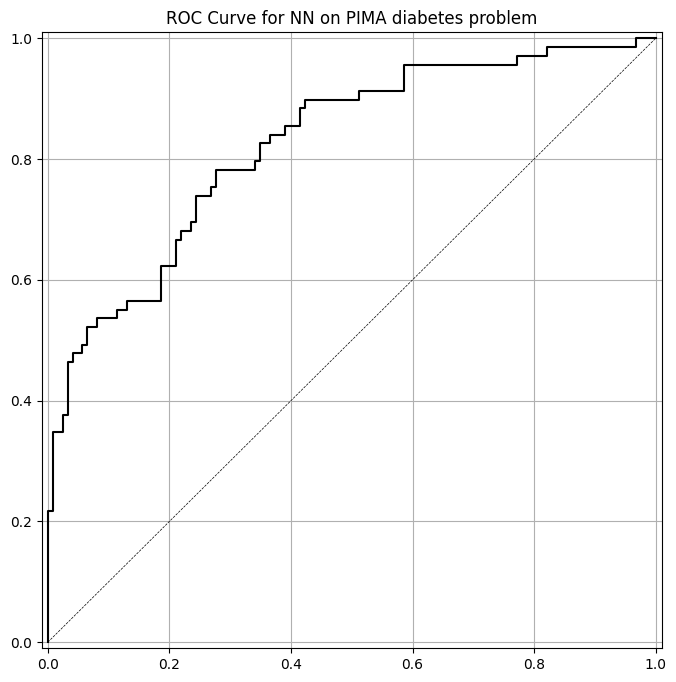

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

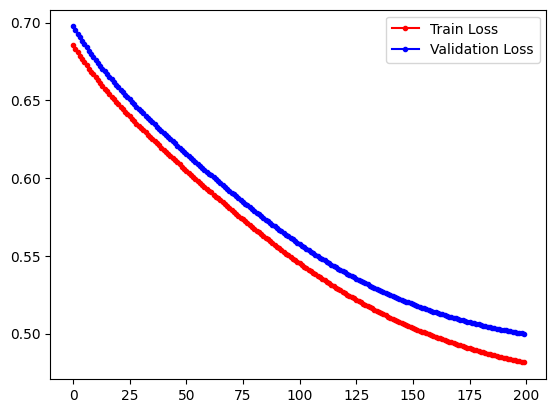

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

<h3> As the epoch gets higher, the loss value of the model decreases. Which means that as more time passes, the model is learning and is able to be more accurate.

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epochs and network structures
* Interpret your result

# Supplementary Activity

In [ ]:
# 2 hidden layers (6 nodes each) that use the RELu function and a final layer that uses the sigmoid function
# Epoch = 1500
# Learning rate = 0.003

my_model = Sequential([
    Dense(6, input_shape=(8,), activation="relu"),
    Dense(6, activation='relu'),
    Dense(1, activation="sigmoid")
])


In [ ]:
my_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = my_model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 20ms/step - loss: 0.7209 - accuracy: 0.5035 - val_loss: 0.7085 - val_accuracy: 0.5625
Epoch 2/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.6976 - accuracy: 0.5451 - val_loss: 0.6920 - val_accuracy: 0.5781
Epoch 3/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.6799 - accuracy: 0.5851 - val_loss: 0.6791 - val_accuracy: 0.6094
Epoch 4/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.6659 - accuracy: 0.6042 - val_loss: 0.6682 - val_accuracy: 0.6250
Epoch 5/1500
18/18 [==============================] - 0s 7ms/step - loss: 0.6544 - accuracy: 0.6181 - val_loss: 0.6592 - val_accuracy: 0.6354
Epoch 6/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.6450 - accuracy: 0.6285 - val_loss: 0.6515 - val_accuracy: 0.6250
Epoch 7/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.6368 - accuracy: 0.6441 - val_loss: 0.6447 - val_accuracy: 0.6302
Epoch

In [ ]:
y_pred_class_nn_2 = (my_model.predict(X_test_norm)>0.5).astype('int32')
y_pred_prob_nn_2 = my_model.predict(X_test_norm)

6/6 [==============================] - 0s 6ms/step


accuracy is 0.755
roc-auc is 0.797


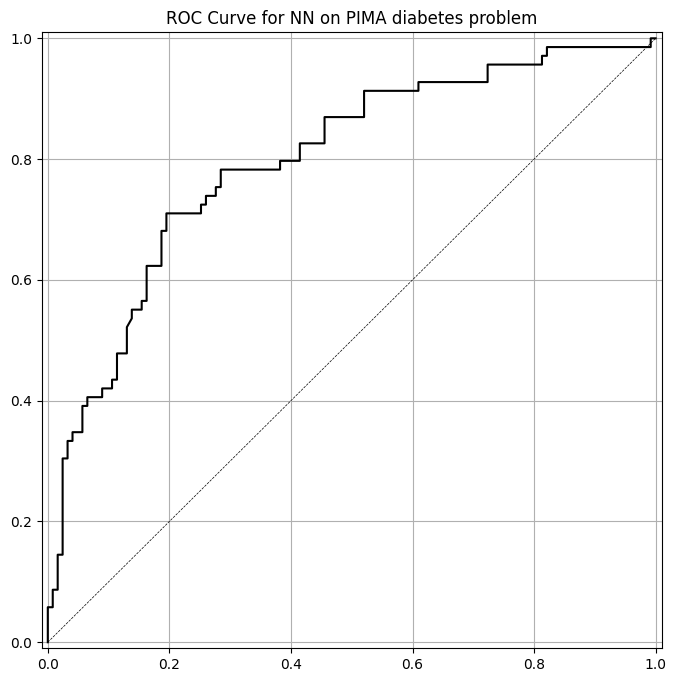

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN')

In [ ]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

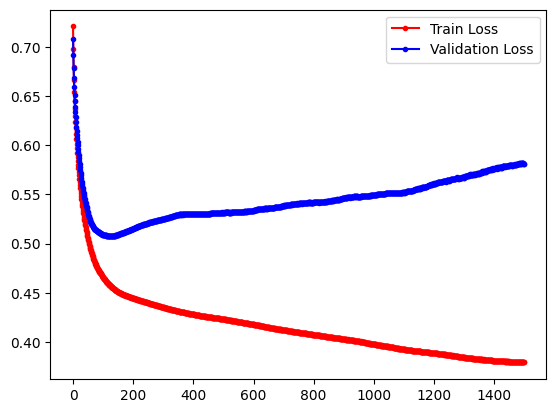

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
# Using 1 hidden layer (6 nodes) with the 'tanh' function
# Epoch = 1000
# Learning rate = 0.001

my_model2 = Sequential([
    Dense(6, input_shape=(8,), activation="tanh"),
    Dense(1, activation="sigmoid")
])


In [ ]:
my_model2.compile(SGD(lr = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = my_model2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 1s 25ms/step - loss: 0.7606 - accuracy: 0.4201 - val_loss: 0.7693 - val_accuracy: 0.4167
Epoch 2/1000
18/18 [==============================] - 0s 11ms/step - loss: 0.7393 - accuracy: 0.4514 - val_loss: 0.7480 - val_accuracy: 0.4479
Epoch 3/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.7204 - accuracy: 0.4913 - val_loss: 0.7290 - val_accuracy: 0.4896
Epoch 4/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.7036 - accuracy: 0.4948 - val_loss: 0.7122 - val_accuracy: 0.5104
Epoch 5/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.6885 - accuracy: 0.5278 - val_loss: 0.6971 - val_accuracy: 0.5365
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6749 - accuracy: 0.5556 - val_loss: 0.6836 - val_accuracy: 0.5729
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.6627 - accuracy: 0.5903 - val_loss: 0.6715 - val_accuracy: 0.6094
Epoc

In [ ]:
y_pred_class_nn_3 = (my_model2.predict(X_test_norm)>0.5).astype('int32')
y_pred_prob_nn_3 = my_model2.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


accuracy is 0.745
roc-auc is 0.816


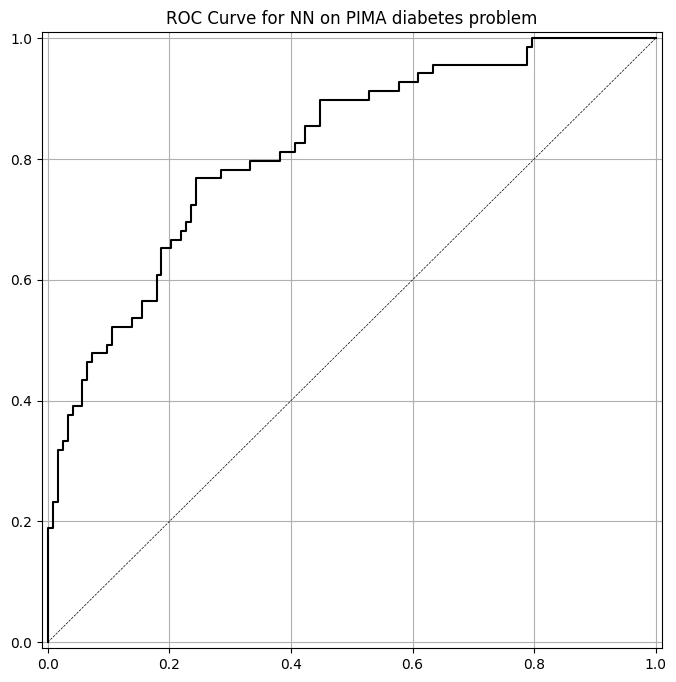

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_3)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_3)))

plot_roc(y_test, y_pred_prob_nn_3, 'NN')

In [ ]:
run_hist_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

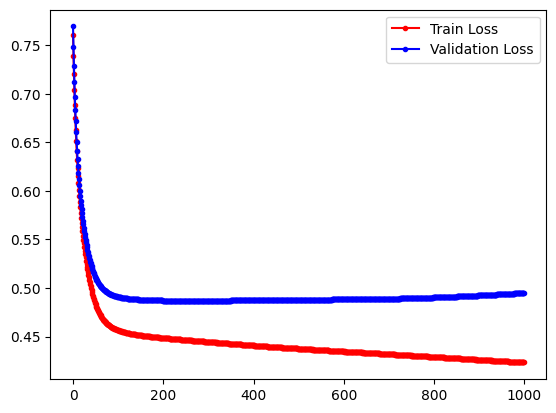

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

# Comparison of models

Text(0.5, 1.0, 'Loss over iterations (model 2)')

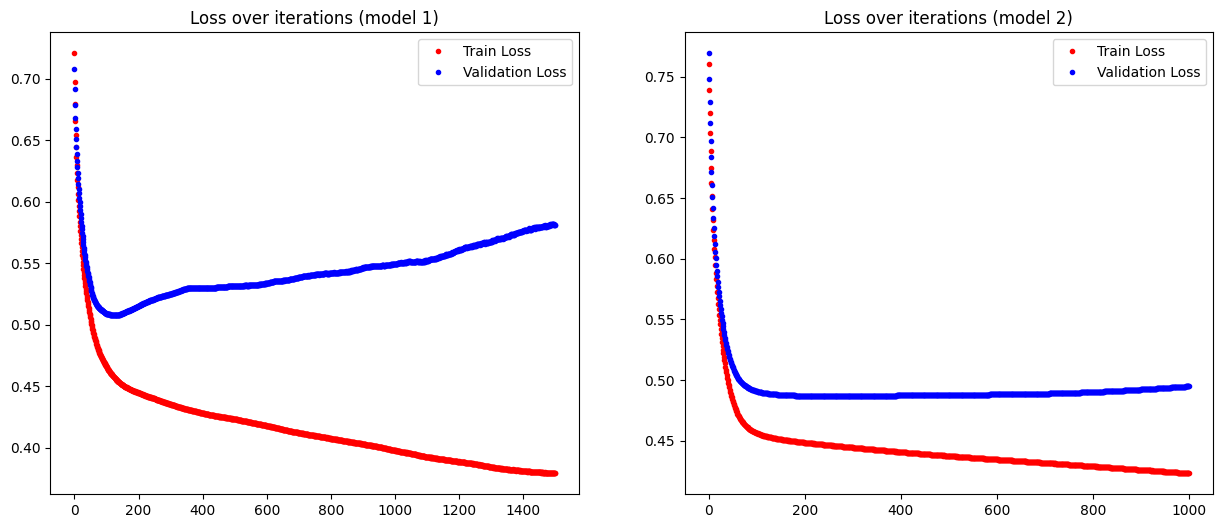

In [ ]:
# Comparison of models with different learning rates, epochs, and network structure

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot((run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot((run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations (model 1)')

ax = fig.add_subplot(1, 2, 2)
ax.plot((run_hist_3.history["loss"]),'r.', label="Train Loss")
ax.plot((run_hist_3.history["val_loss"]),'b.', label="Validation Loss")
ax.legend(loc='upper right')
ax.set_title('Loss over iterations (model 2)')

<b> It seems that the model 2 is slightly better than model 1 as the validation loss for model 1 rises up faster compared to the other model.

# New dataset (Fake bills dataset)

In [ ]:
bills=pd.read_csv("/content/drive/MyDrive/CPE312 Files/fake_bills.csv", sep=';')
bills.head(5)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
bills = bills.dropna(axis = 0, how = 'any')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bills['is_genuine']= le.fit_transform(bills['is_genuine'])

In [ ]:
bills.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
bills.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [ ]:
X = bills.drop('is_genuine', axis=1)
y = bills['is_genuine']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 11111)

In [ ]:
normalizer = StandardScaler()
X_train_norm1 = normalizer.fit_transform(X_train1)
X_test_norm1 = normalizer.transform(X_test1)

# Creating the model

In [ ]:
new_model = Sequential([
    Dense(6, input_shape=(6,), activation="relu"),
    Dense(6, activation='relu'),
    Dense(1, activation="sigmoid")
])

In [ ]:
new_model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_new = new_model.fit(X_train_norm1, y_train1, validation_data=(X_test_norm1, y_test1), epochs=500)

Epoch 1/500
37/37 [==============================] - 1s 8ms/step - loss: 0.6368 - accuracy: 0.5838 - val_loss: 0.6024 - val_accuracy: 0.7372
Epoch 2/500
37/37 [==============================] - 0s 6ms/step - loss: 0.5829 - accuracy: 0.7795 - val_loss: 0.5554 - val_accuracy: 0.8294
Epoch 3/500
37/37 [==============================] - 0s 8ms/step - loss: 0.5351 - accuracy: 0.8812 - val_loss: 0.5122 - val_accuracy: 0.8976
Epoch 4/500
37/37 [==============================] - 0s 8ms/step - loss: 0.4904 - accuracy: 0.9145 - val_loss: 0.4712 - val_accuracy: 0.9283
Epoch 5/500
37/37 [==============================] - 0s 9ms/step - loss: 0.4478 - accuracy: 0.9359 - val_loss: 0.4323 - val_accuracy: 0.9352
Epoch 6/500
37/37 [==============================] - 0s 9ms/step - loss: 0.4070 - accuracy: 0.9462 - val_loss: 0.3952 - val_accuracy: 0.9454
Epoch 7/500
37/37 [==============================] - 0s 9ms/step - loss: 0.3683 - accuracy: 0.9581 - val_loss: 0.3604 - val_accuracy: 0.9556
Epoch 8/500
3

In [ ]:
y_pred_class_nn_new = (new_model.predict(X_test_norm1)>0.5).astype('int32')
y_pred_prob_nn_new = new_model.predict(X_test_norm1)

10/10 [==============================] - 0s 4ms/step


accuracy is 0.986
roc-auc is 0.994


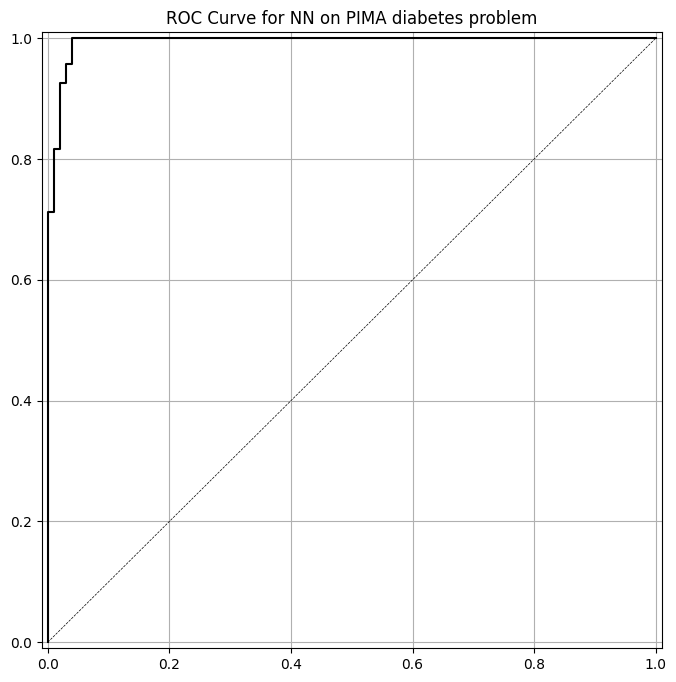

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test1,y_pred_class_nn_new)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test1,y_pred_prob_nn_new)))

plot_roc(y_test1, y_pred_prob_nn_new, 'NN')

In [ ]:
run_hist_new.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

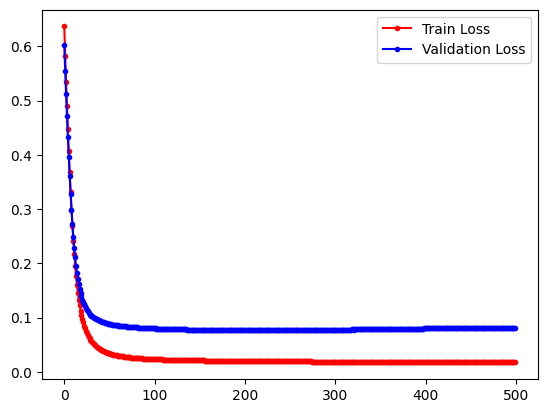

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_new.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_new.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [ ]:
new_model1 = Sequential([
    Dense(6, input_shape=(6,), activation="sigmoid"),
    Dense(1, activation="tanh")
])

In [ ]:
new_model1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_new1 = new_model1.fit(X_train_norm1, y_train1, validation_data=(X_test_norm1, y_test1), epochs=500)

Epoch 1/500
37/37 [==============================] - 1s 7ms/step - loss: 1.4601 - accuracy: 0.6368 - val_loss: 0.5297 - val_accuracy: 0.7133
Epoch 2/500
37/37 [==============================] - 0s 3ms/step - loss: 0.4796 - accuracy: 0.7752 - val_loss: 0.4484 - val_accuracy: 0.8259
Epoch 3/500
37/37 [==============================] - 0s 3ms/step - loss: 0.4085 - accuracy: 0.8427 - val_loss: 0.3859 - val_accuracy: 0.8805
Epoch 4/500
37/37 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.8897 - val_loss: 0.3323 - val_accuracy: 0.9147
Epoch 5/500
37/37 [==============================] - 0s 3ms/step - loss: 0.2996 - accuracy: 0.9197 - val_loss: 0.2918 - val_accuracy: 0.9283
Epoch 6/500
37/37 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.9402 - val_loss: 0.2605 - val_accuracy: 0.9386
Epoch 7/500
37/37 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9556 - val_loss: 0.2344 - val_accuracy: 0.9454
Epoch 8/500
3

In [ ]:
y_pred_class_nn_new1 = (new_model1.predict(X_test_norm1)>0.5).astype('int32')
y_pred_prob_nn_new1 = new_model1.predict(X_test_norm1)

10/10 [==============================] - 0s 8ms/step


accuracy is 0.986
roc-auc is 0.995


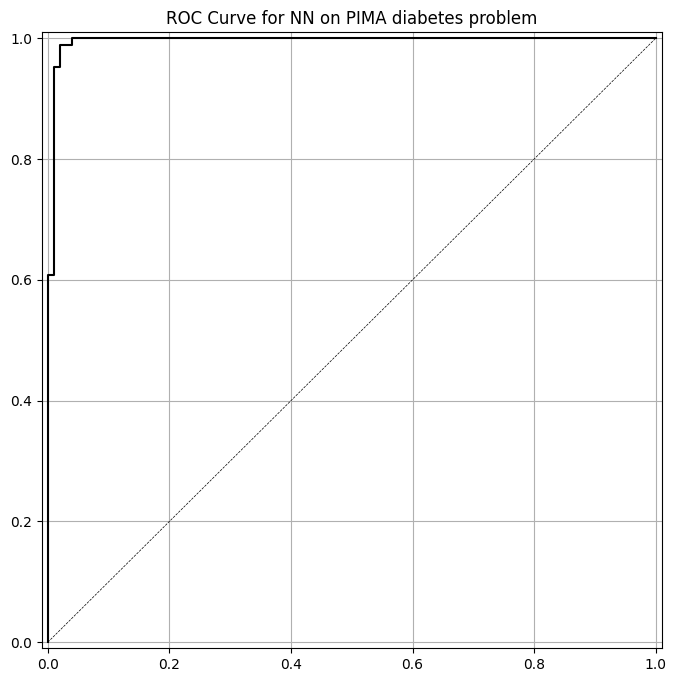

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test1,y_pred_class_nn_new1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test1,y_pred_prob_nn_new1)))

plot_roc(y_test1, y_pred_prob_nn_new1, 'NN')

In [ ]:
run_hist_new1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

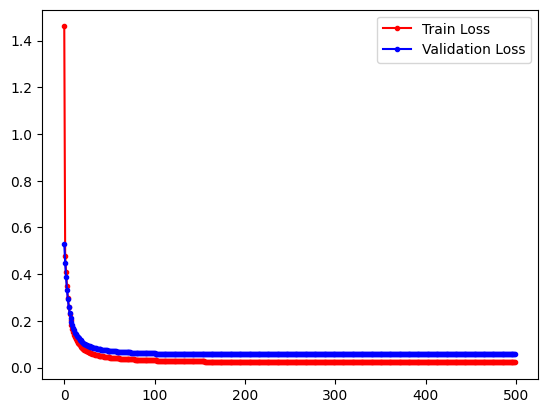

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_new1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_new1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

# Comparison of the new models

Text(0.5, 1.0, 'Loss over iterations (model 2)')

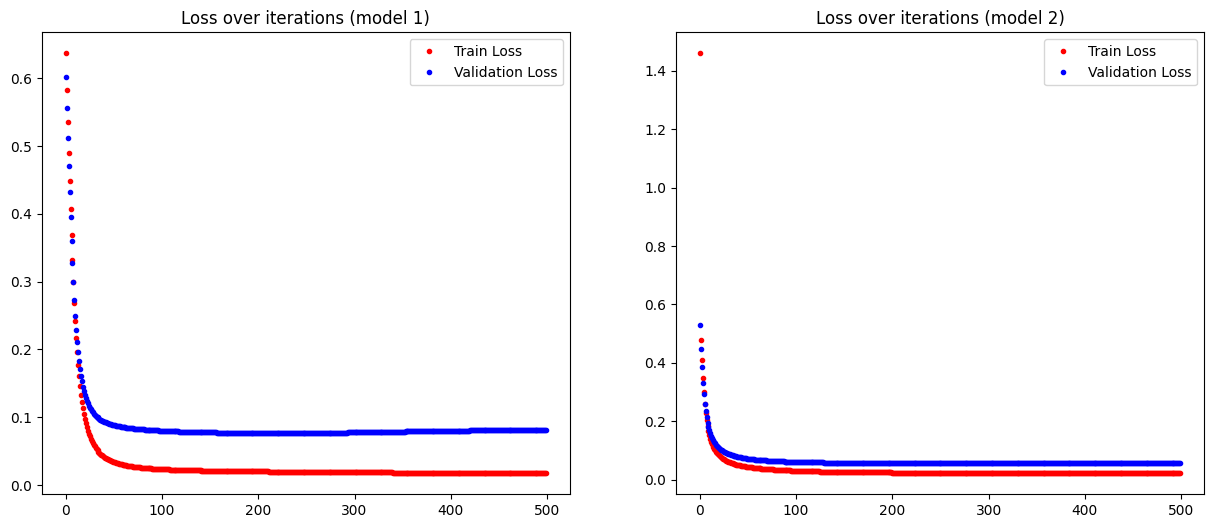

In [ ]:
# Comparison of models with different learning rates, epochs, and network structure

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot((run_hist_new.history["loss"]),'r.', label="Train Loss")
ax.plot((run_hist_new.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations (model 1)')

ax = fig.add_subplot(1, 2, 2)
ax.plot((run_hist_new1.history["loss"]),'r.', label="Train Loss")
ax.plot((run_hist_new1.history["val_loss"]),'b.', label="Validation Loss")
ax.legend(loc='upper right')
ax.set_title('Loss over iterations (model 2)')

<b> Model 1 seems to be better trained because model 2 seems to be overfit.

#### Conclusion

 In this laboratory activity, we trained neural networks with a diabetes dataset. The model used is a Sequential model where we input a specific number of nodes, hidden layer, and what activation function to use. With a model built, we then trained the model with a 75:25 split. For the supplementary activity, we are tasked to create a new model and compare it to see if changing certain values and functions would change the performance of the model. Based on that, it is important to know what functions and values you are changing to achieve optimal results. All in all, when training a neural network it is important to know what you are changing to achieve your desired results.